In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('user_behavior_dataset.csv')

In [3]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


NO column has any null value. This is good.

In [27]:
df.duplicated().sum()

0

NO Duplicates

UNIVARIATE ANALYSIS

In [5]:
df['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

In [6]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

Text(0.5, 1.0, 'Number of Apps Installed')

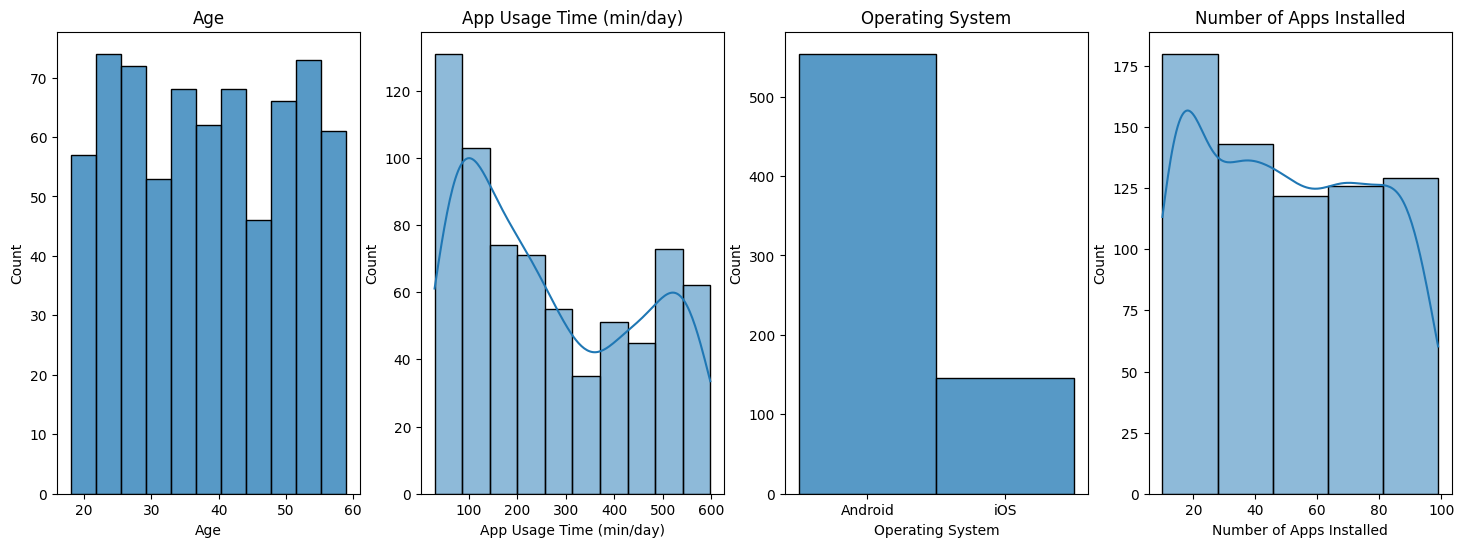

In [8]:
fig, axs = plt.subplots(1, 4, figsize = (18,6))
sns.histplot(df['Age'], ax= axs[0])
axs[0].set_title('Age')
sns.histplot(df['App Usage Time (min/day)'], ax = axs[1], bins = 10, kde =True)
axs[1].set_title('App Usage Time (min/day)')
sns.histplot(df['Operating System'], ax = axs[2])
axs[2].set_title('Operating System')
sns.histplot(df['Number of Apps Installed'], ax = axs[3], bins = 5, kde = True)
axs[3].set_title('Number of Apps Installed')


Android has a bigger market share than iOS. 
Age of users is randomly distributed. 
App Usage time has a normal distribution with two crests.

<Axes: xlabel='Gender', ylabel='Percent'>

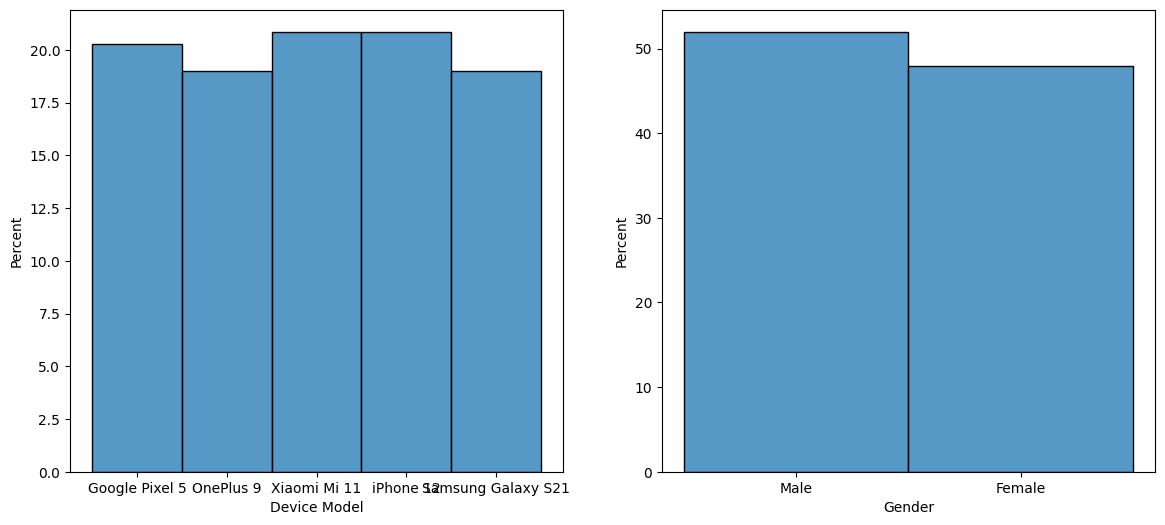

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.histplot(df['Device Model'], stat = 'percent', ax = axs[0])
sns.histplot(df['Gender'], stat = 'percent', ax  =axs[1])


User Behaviour Class refers to the usage of a person (from light to extreme)

<Axes: xlabel='User Behavior Class', ylabel='Probability'>

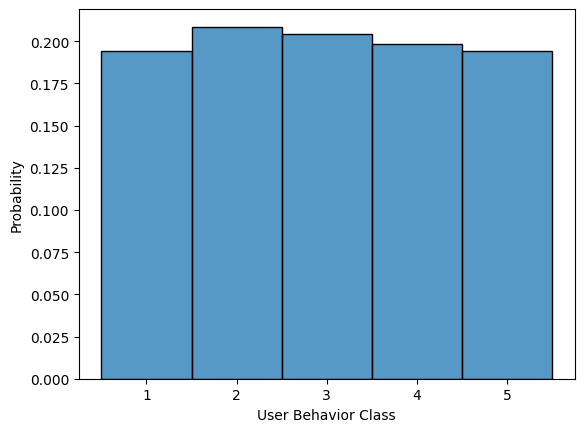

In [10]:
sns.histplot(df['User Behavior Class'], discrete= True , stat = 'probability')

This statistic shows that number of people belonging to class 5 (extremely high usage) is approximately equal to those belonging to class 1(light usage).

In [11]:
statistics = df.describe().drop(columns=['User ID', 'User Behavior Class'])
statistics

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


Median of App Usage Time is 227 min/day.
Median of Screen On Time is 4.9 hours/day
Median of Battery Drain is 1502.5 mAh/day
Median of Number of Apps Installed is 49
Median of Data Usage is 823 (MB/day)
Medain of Age is 38 years

<Axes: ylabel='Battery Drain (mAh/day)'>

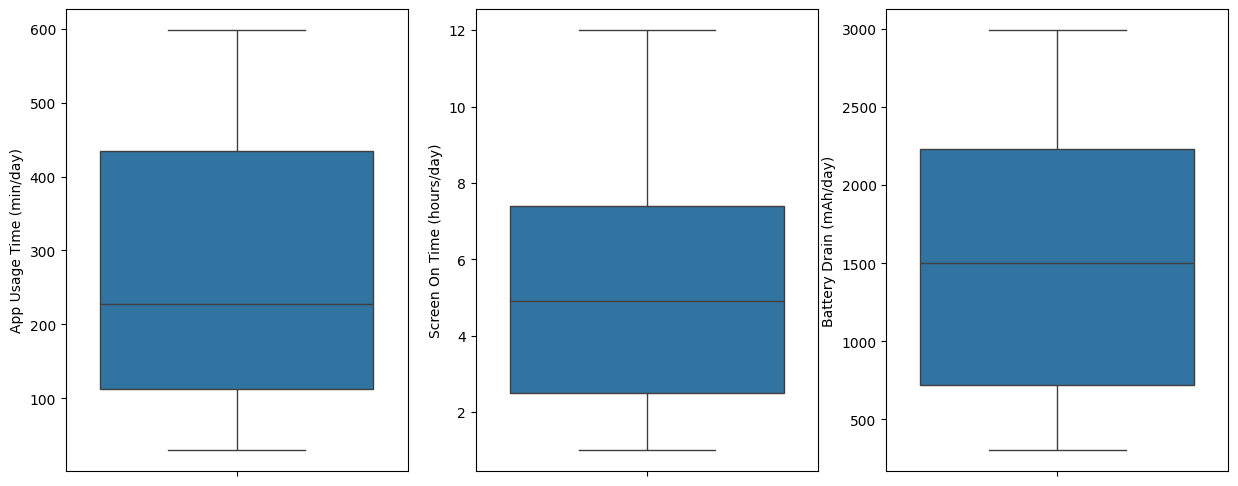

In [12]:
fig, ax = plt.subplots(1,3, figsize = (15,6))

sns.boxplot(data = df['App Usage Time (min/day)'], ax = ax[0])
sns.boxplot(df['Screen On Time (hours/day)'], ax = ax[1])
sns.boxplot(df['Battery Drain (mAh/day)'], ax  = ax[2])

<Axes: ylabel='Age'>

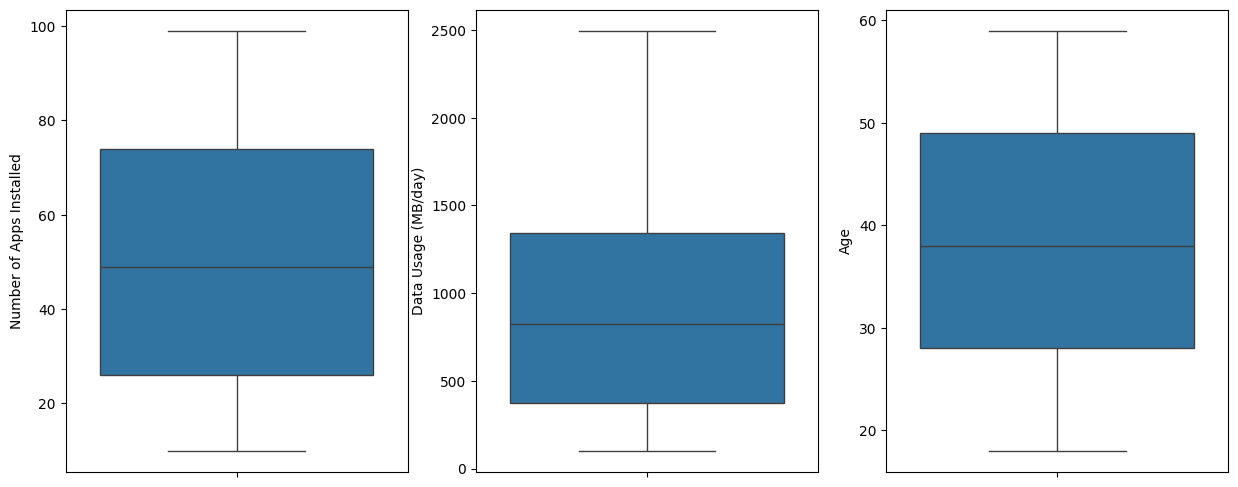

In [13]:
fig, ax = plt.subplots(1,3, figsize = (15,6))
sns.boxplot(data = df['Number of Apps Installed'], ax = ax[0])
sns.boxplot(df['Data Usage (MB/day)'], ax = ax[1])
sns.boxplot(df['Age'], ax = ax[2])


There are no particular outliers here.

MULTIVARIATE ANALYSIS

1. Numerical and Numerical

In [14]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [15]:
df.drop(columns=['User ID', 'Device Model', 'Operating System', 'Gender']).corr()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


Most parameters show good correlation with each other but this isn't the case with AGE.

<Axes: xlabel='Number of Apps Installed', ylabel='Battery Drain (mAh/day)'>

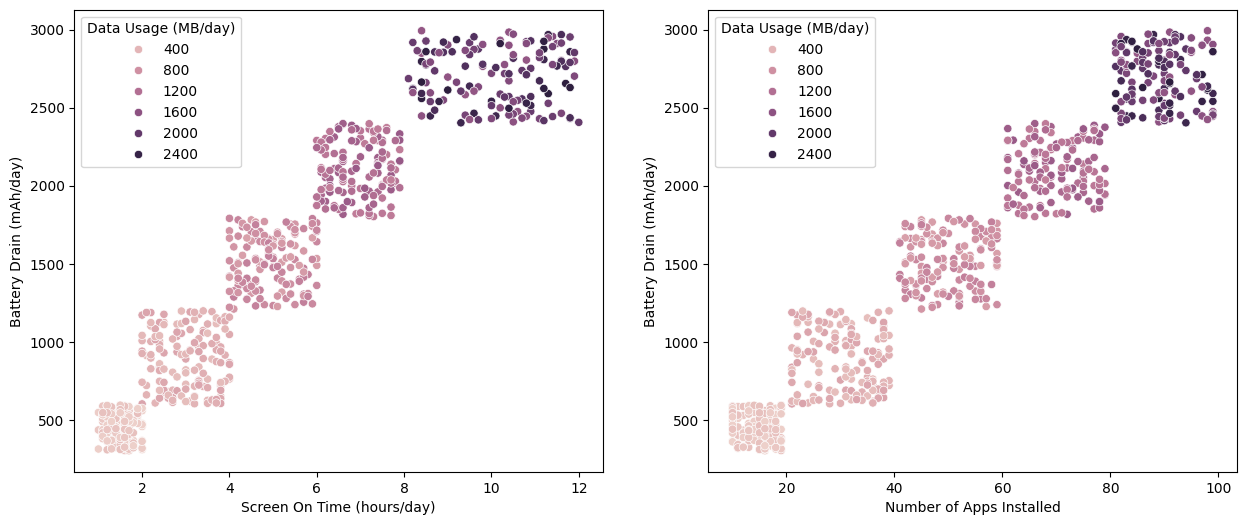

In [16]:
fig, axs = plt.subplots(1,2, figsize = (15,6))
sns.scatterplot(x= df['Screen On Time (hours/day)'], y = df['Battery Drain (mAh/day)'], hue = df['Data Usage (MB/day)'] ,ax = axs[0])
sns.scatterplot(x= df['Number of Apps Installed'], y = df['Battery Drain (mAh/day)'], hue = df['Data Usage (MB/day)'] ,ax = axs[1])

<Axes: xlabel='Screen On Time (hours/day)', ylabel='Battery Drain (mAh/day)'>

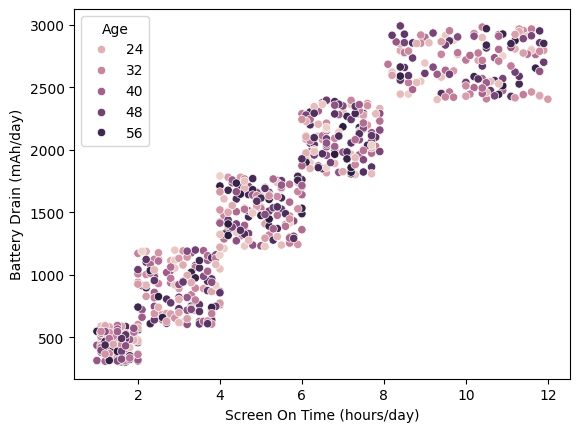

In [17]:
sns.scatterplot(x= df['Screen On Time (hours/day)'], y = df['Battery Drain (mAh/day)'], hue = df['Age'] )

Clearly, 'Age' has no relation with other variables.

2. Numerical and Categorical

<Axes: xlabel='Gender', ylabel='percent'>

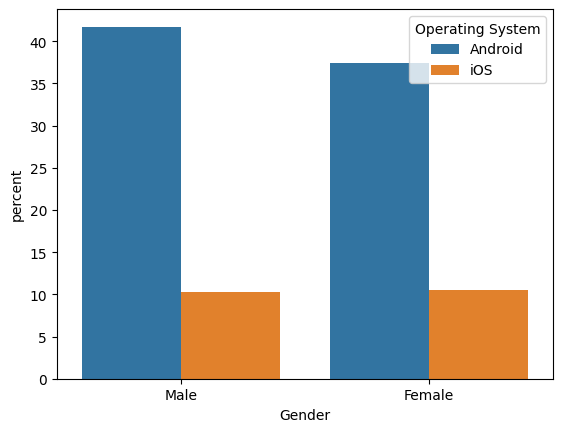

In [18]:
sns.countplot(x='Gender', hue='Operating System', data=df, stat = 'percent')


Proportion of Female carrying iPhone to Android is greater than that of Men carrying iPhone to Android

<Axes: xlabel='Gender', ylabel='Screen On Time (hours/day)'>

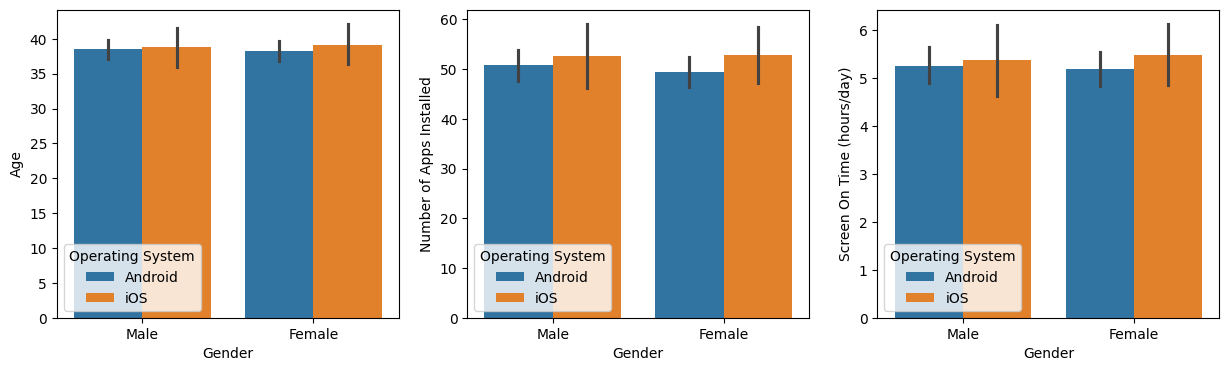

In [19]:
fig, axs = plt.subplots(1,3, figsize = (15,4))
sns.barplot(x = df['Gender'], y  = df['Age'],hue = df['Operating System'] ,ax = axs[0])
sns.barplot(x = df['Gender'], y = df['Number of Apps Installed'],hue = df['Operating System'] ,ax = axs[1])
sns.barplot(x=  df['Gender'],  y = df['Screen On Time (hours/day)'], hue = df['Operating System'] , ax = axs[2])

Clearly, women and men, both on average tend to spend >5 hours on mobile (greater on iPhone than Android).

<Axes: xlabel='Gender', ylabel='Battery Drain (mAh/day)'>

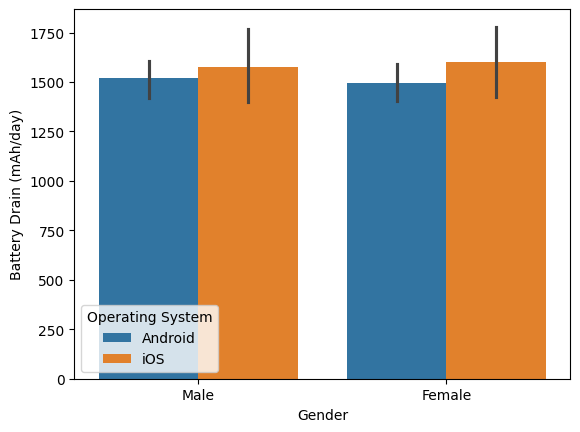

In [20]:
sns.barplot(x = df['Gender'], y = df['Battery Drain (mAh/day)'], hue  = df['Operating System'])

Inference: Even though the number of people owning IPhone is much less than those owning Android, still Iphone users have on average more Number of Apps installed, have more screen time and hence more battery drain. 

Now lets see relation of operating system with age.

<Axes: xlabel='Age', ylabel='count'>

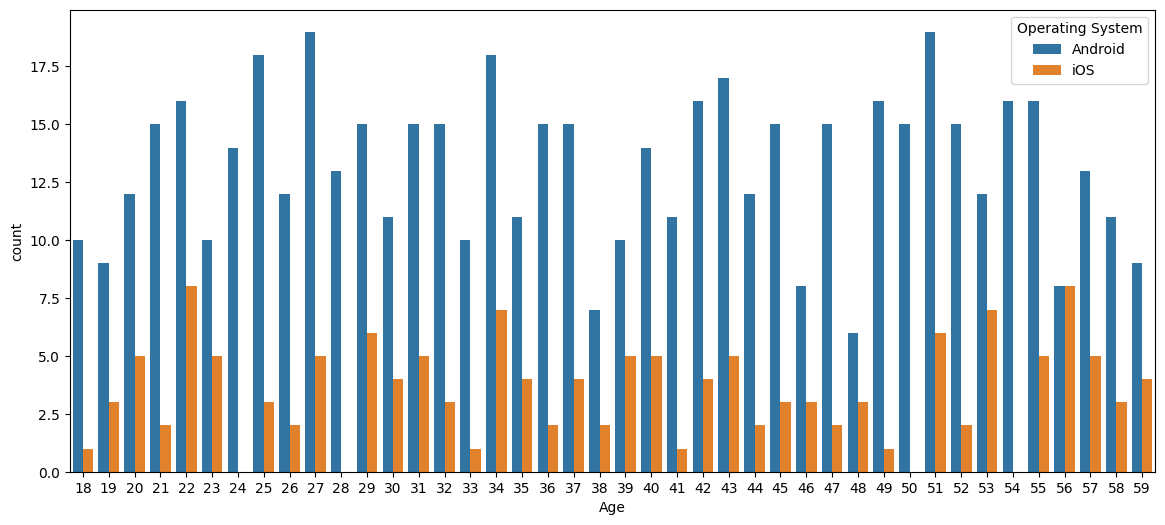

In [21]:
fig, ax = plt.subplots(figsize = (14,6))
sns.countplot(x= df['Age'],  hue=df['Operating System'])

There is no apparent major correlation between Age and Operating System used by the person. Still, lets do an ANOVA test to check correlation between gender, operating system ,battery drain

In [22]:
from scipy.stats import f_oneway

In [23]:
group1 = df.groupby(df['Gender'])['Battery Drain (mAh/day)'].apply(list)
group2 =  df.groupby(df['Operating System'])['Battery Drain (mAh/day)'].apply(list)

anova_gender = f_oneway(*group1)
anova_os = f_oneway(*group2)

print("ANOVA results for Gender:")
print("F-statistic:", anova_gender.statistic)
print("p-value:", anova_gender.pvalue)

print("\nANOVA results for Operating System:")
print("F-statistic:", anova_os.statistic)
print("p-value:", anova_os.pvalue)

ANOVA results for Gender:
F-statistic: 0.027453936647778433
p-value: 0.868447088563707

ANOVA results for Operating System:
F-statistic: 1.1388886258788384
p-value: 0.28625625395745585


F-statistic for Gender shows that there is not much difference between the two genders. Anova for Operating System does give us a bigger value, but the fact that its p value is greater than 0.05 means that it is not able to reject the null hypothesis (that there is no differnce between two groups)

3. Categorical and Categorical  (Gender and Operating System)

Doing a ChiSquare test 

In [24]:
from scipy.stats import chi2_contingency

In [25]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Gender'], df['Operating System']))
p

0.524237482456694

As the p value is greater than 0.05, this means that our null hypothesis stands true. This means that there is not much relation between these two.

# Our Conclusions: 

1. Number of people belonging to class 5 users (extreme users) is simillar to number of people belonging to class 1 (light users).
2. Gender is not a factor in deciding whose screen time is going to be more
3. Age is also not a good factor in deciding whose screen time is going to be more
4. There are more men than women in the dataset.
5. By proportion, women tend to own more Apple devices than men.
6. Android devices are more popular than Apple devices.
7. People (irrespective of age and gender) tend to download more apps, exhaust more data and have more screen time on Apple device than Android devices. Battery is also exhausted more on Apple devices (though this metric needs more data to be proved)